Nome Rm Email

O código começa importando as bibliotecas necessárias, incluindo pi (constante matemática π), as funções cos e sin (cosseno e seno), e a classe QuantumCircuit do Qiskit.

In [1]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

Aqui, um valor chamado theta é definido e pode ser modificado para qualquer valor entre 0 e 1. Esse valor será usado no cálculo posterior.

In [2]:
theta = 0.7  # Can be changed to any value between 0 and 1

Um circuito quântico qc é criado com 2 qubits (q0 e q1) e 1 bit clássico (c0).

In [3]:
qc = QuantumCircuit(2, 1)

O vetor próprio é preparado no estado |1> aplicando uma porta X (porta de negação) no qubit q1. A barreira (barrier()) é usada para separar etapas do circuito para melhor visualização.

In [4]:
# Prepare eigenvector, which is the |1> state
qc.x(1)
qc.barrier()

O procedimento de estimação é implementado. Inicialmente, uma porta Hadamard (h(0)) é aplicada ao qubit q0. Em seguida, a porta de controle de fase (cp()) é aplicada com o ângulo 2 * pi * theta entre q0 e q1. Por fim, outra porta Hadamard (h(0)) é aplicada em q0.

In [5]:
# Implement the estimation procedure
qc.h(0)
qc.cp(2 * pi * theta, 0, 1)
qc.h(0)
qc.barrier()

A medição final é realizada, onde o resultado é armazenado no bit clássico c0, correspondente ao qubit q0.

In [6]:
# Perform the final measurement
qc.measure(0, 0)

O circuito quântico é desenhado e exibido para visualização.

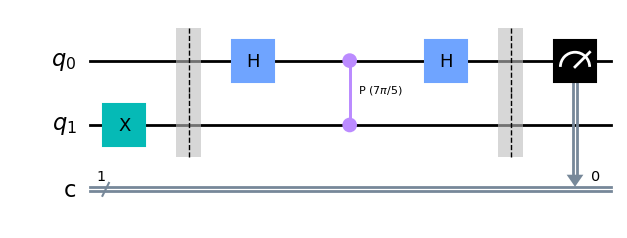

In [7]:
# Draw the circuit
display(qc.draw())

In [8]:
from qiskit.primitives import Sampler

display(Sampler().run(qc).result().quasi_dists[0])

{0: 0.3454915028125262, 1: 0.6545084971874736}

O circuito é executado usando o Qiskit. Os resultados das medições são exibidos, bem como os resultados esperados calculados. Isso compara os resultados reais com os resultados previstos com base no valor de theta.

In [9]:
display({   # Calculate predicted results
    0: cos(pi * theta) ** 2,
    1: sin(pi * theta) ** 2
})

{0: 0.34549150281252616, 1: 0.6545084971874737}

# Estimação de Fase (Phase Estimation) em Computação Quântica

A Estimação de Fase é um dos algoritmos quânticos mais fundamentais e é usado para estimar a fase de um operador unitário em um estado quântico. Vamos explicar o funcionamento da Estimação de Fase, incluindo a parte matemática.

## Pré-requisitos

- Compreensão básica de computação quântica.
- Familiaridade com operações matemáticas, como exponenciais complexas e operadores unitários.

## Etapas da Estimação de Fase

A Estimação de Fase envolve as seguintes etapas:

### 1. Preparação do Estado

- Inicialmente, preparamos um estado quântico que contém um qubit de controle e um registrador de destino com qubits suficientes para armazenar a estimativa de fase.
- O registrador de destino é inicializado em um estado conveniente, geralmente o estado |0⟩.

### 2. Aplicação do Operador de Fase

- Em seguida, aplicamos um operador unitário U controlado pelo qubit de controle.
- O operador U é aquele cuja fase desejamos estimar.

### 3. Transformada de Fourier Quântica (QFT)

- Aplicamos a Transformada de Fourier Quântica (QFT) ao registrador de destino.
- A QFT gera uma superposição de estados com amplitudes relacionadas à fase que queremos estimar.

### 4. Medição

- Realizamos medições no registrador de destino.
- As medições colapsam o estado quântico, fornecendo uma estimativa da fase.

## Matemática da Estimação de Fase

A parte matemática da Estimação de Fase envolve a aplicação do operador de fase e a QFT. A fase é estimada medindo os qubits no registrador de destino após a aplicação da QFT.

A fase estimada é diretamente relacionada à probabilidade de medir um valor específico. A precisão da estimativa depende do número de qubits no registrador de destino.

## Aplicações

A Estimação de Fase tem várias aplicações em computação quântica, incluindo algoritmos de fatorização de inteiros, algoritmos de busca quantica e simulações quânticas.

## Conclusão

A Estimação de Fase é uma técnica quântica poderosa para estimar a fase de operadores unitários em estados quânticos. Ela é fundamental em muitos algoritmos quânticos e simulações. A precisão da estimativa depende do número de qubits no registrador de destino.

Espero que esta explicação tenha esclarecido o funcionamento da Estimação de Fase, incluindo a parte matemática envolvida.


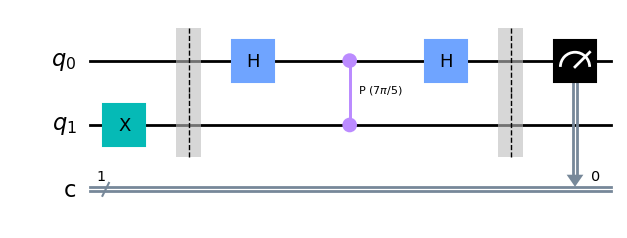

In [10]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

theta = 0.7  # Can be changed to any value between 0 and 1

qc = QuantumCircuit(2, 1)

# Prepare eigenvector, which is the |1> state

qc.x(1)
qc.barrier()

# Implement the estimation procedure
qc.h(0)
qc.cp(2 * pi * theta, 0, 1)
qc.h(0)
qc.barrier()

# Perform the final measurement
qc.measure(0, 0)

# Draw the circuit
display(qc.draw())

Agora uma versão simplificada que se concentra apenas na etapa de Estimação de Fase do procedimento, omitindo a preparação do estado inicial e a Transformada de Fourier Quântica.

In [11]:
from qiskit.primitives import Sampler

display(Sampler().run(qc).result().quasi_dists[0])

{0: 0.3454915028125262, 1: 0.6545084971874736}

In [12]:
display({   # Calculate predicted results
    0: cos(pi * theta) ** 2,
    1: sin(pi * theta) ** 2
})

{0: 0.34549150281252616, 1: 0.6545084971874737}

Neste código, um circuito quântico com 3 qubits é usado (q0, q1, q2), com 2 bits clássicos (c0, c1) para medição.

Assim como no segundo código, o código atual começa com a preparação do vetor próprio aplicando uma porta X (porta de negação) ao qubit q2.

Ambos os códigos incluem as etapas iniciais com portas Hadamard (portas H) nos qubits q0 e q1.

A diferença está nos operadores de controle de fase (cp) aplicados. Neste código, são aplicados dois operadores de controle de fase em q0 (para o qubit q2) e q1 (também para o qubit q2). Os ângulos são diferentes, refletindo uma estimativa mais precisa da fase.

O código atual inclui uma implementação da inversa da Transformada de Fourier Quântica (QFT) para dois qubits, que envolve a troca dos qubits, portas Hadamard e operadores de controle de fase. Esta é uma etapa que permite a recuperação da estimativa de fase.

Da mesma forma que o segundo código, este código também inclui medições nos qubits q0 e q1 e armazena os resultados nos bits clássicos c0 e c1.

Em comparação com o segundo código, este código é um pouco mais complexo devido às operações adicionais da inversa da QFT e aos ângulos diferentes nos operadores de controle de fase.

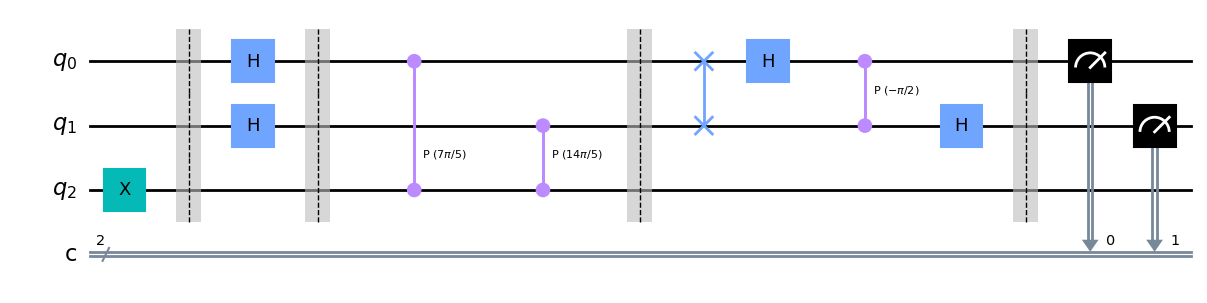

In [13]:
from math import pi
from qiskit import QuantumCircuit

theta = 0.7
qc = QuantumCircuit(3, 2)

# Prepare the eigenvector
qc.x(2)
qc.barrier()

# The initial Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()

# The controlled unitary gates
qc.cp(2 * pi * theta, 0, 2)
qc.cp(2 * pi * (2 * theta), 1, 2)
qc.barrier()

# An implementation of the inverse of the two-qubit QFT
qc.swap(0, 1)
qc.h(0)
qc.cp(-pi / 2, 0, 1)
qc.h(1)
qc.barrier()

# And finally the measurements
qc.measure([0, 1], [0, 1])
display(qc.draw())

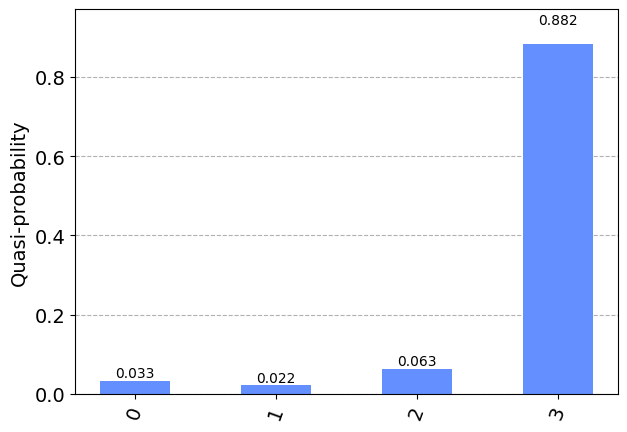

In [14]:
from qiskit.visualization import plot_histogram

result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))